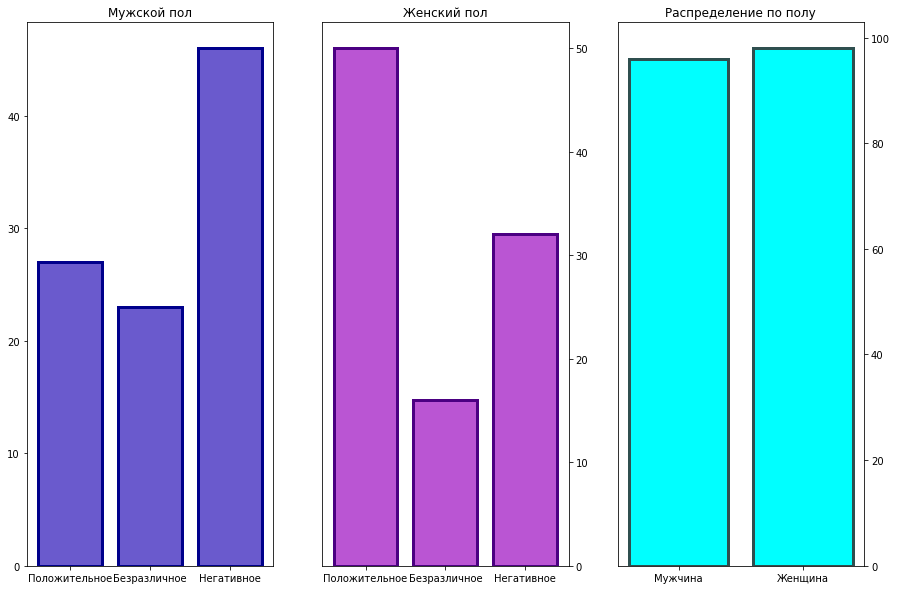

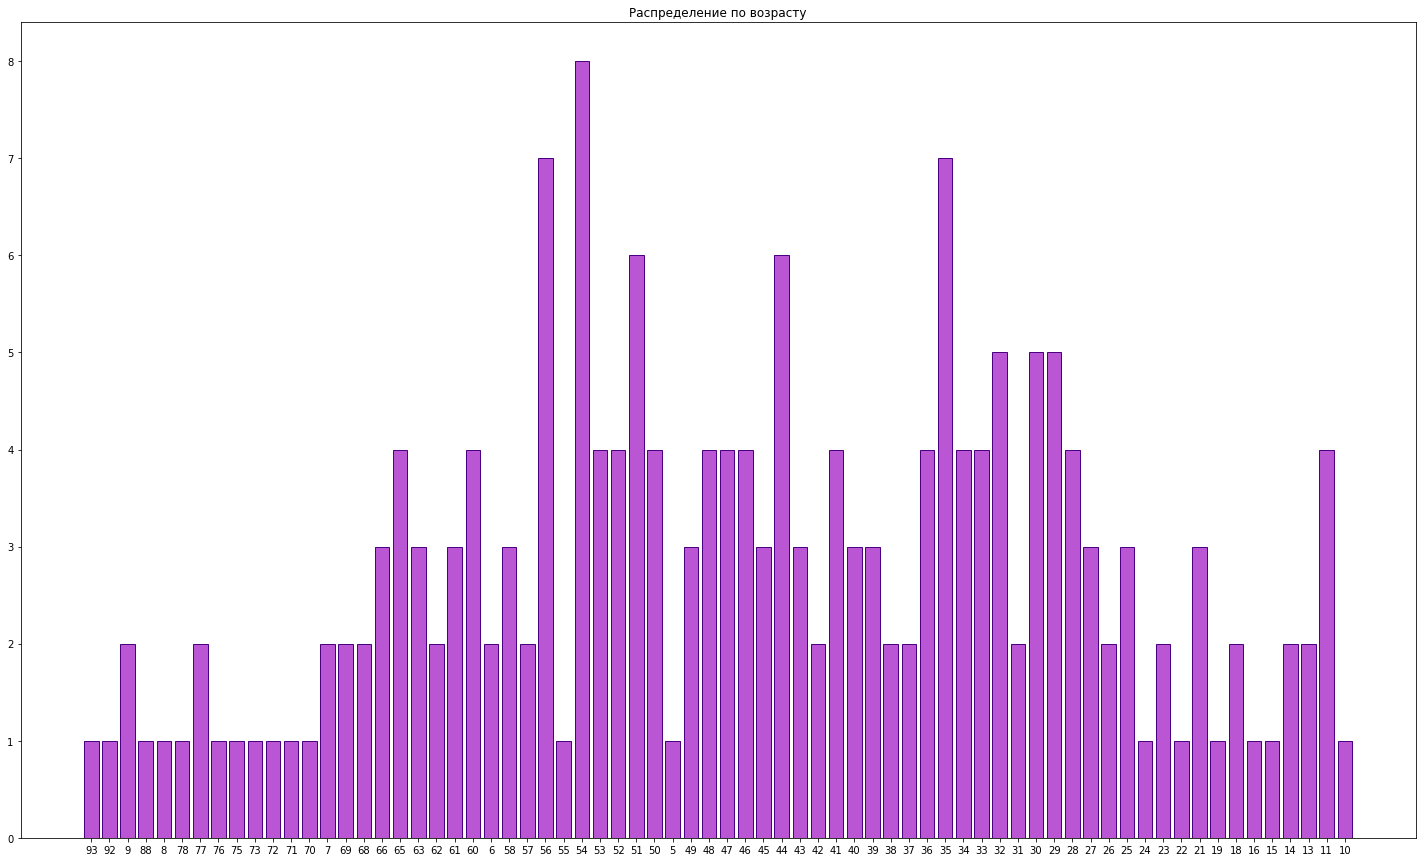

In [23]:
import csv
import matplotlib.pyplot as plt
import numpy as np


'''
Задание 1 Считать данные из файла trailer.csv. Построить гистограммы
респондентов: по признаку пол; по признаку отношение респондента к
трейлеру, по возрасту (средствами модуля numpy).
'''

'''
https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
'''

def reader(file_name):
    gender = []
    opinion = []
    ages = []
    
    with open(file_name) as file:
        reader = csv.DictReader(file, delimiter=';')
        for row in reader:
            gender.append(row['Пол'])
            opinion.append(row['Отношение'])
            ages.append(row['Возраст']) 
    return gender, opinion, ages


def data_analysis_opinion(genders, opinions):
    neu = 'безразличное'
    pos = 'положительное'
    neg = 'отрицательное'
    
    male_pos = 0
    male_neu = 0
    male_neg = 0
    fem_pos = 0
    fem_neu = 0
    fem_neg = 0
    
    male_opinion = []
    female_opinion = []
    
    for index, gender in enumerate(genders):
        if gender == 'мужчина':
            male_opinion.append(opinions[index])
        else:
            female_opinion.append(opinions[index])
    
    for opinion in male_opinion:
        if opinion == pos:
            male_pos += 1
        elif opinion == neu:
            male_neu += 1
        elif opinion == neg:
            male_neg += 1
            
    for opinion in female_opinion:
        if opinion == pos:
            fem_pos += 1
        elif opinion == neu:
            fem_neu += 1
        elif opinion == neg:
            fem_neg += 1
            
    male = [male_pos, male_neu, male_neg]
    female = [fem_pos, fem_neu, fem_neg]
    
    return male, female

def data_analysis_gender(genders):
    males = 0
    womans = 0
    
    for gender in genders:
        if gender == 'мужчина':
            males += 1
        else:
            womans += 1
    return males, womans


def data_analysis_ages(ages):
    sub_set = sorted(list(set(ages)), reverse=True)    
    sub_list = [ages.count(age) for age in sub_set]
    return sub_set, sub_list
        
    
    
    
path = 'trailer.csv'
genders = reader(path)[0]
opinions = reader(path)[1]
ages = reader(path)[2]

male = np.array(data_analysis_opinion(genders, opinions)[0])
female = np.array(data_analysis_opinion(genders, opinions)[1])
opinion = ['Положительное', 'Безразличное', 'Негативное']

gender_numbers = [data_analysis_gender(genders)[0], data_analysis_gender(genders)[1]]
gender_list = ['Мужчина', 'Женщина']

ages_set = np.array(data_analysis_ages(ages)[0])
ages_list = np.array(data_analysis_ages(ages)[1])


fig_one, (ax1, ax2, ax4) = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
fig_two, (ax3) = plt.subplots(nrows=1, ncols=1, figsize=(25, 15))

ax1.bar(opinion, male, color='slateblue', edgecolor='darkblue', linewidth=3)
ax1.set_title('Мужской пол')
ax2.bar(opinion, female, color ='mediumorchid', edgecolor='indigo', linewidth=3)
ax2.set_title('Женский пол')
ax2.yaxis.tick_right()

ax3.bar(ages_set, ages_list, color ='mediumorchid', edgecolor='indigo', linewidth=1)
ax3.set_title('Распределение по возрасту')

ax4.bar(gender_list, gender_numbers, color='cyan', edgecolor='darkslategrey', linewidth=3)
ax4.set_title('Распределение по полу')
ax4.yaxis.tick_right()

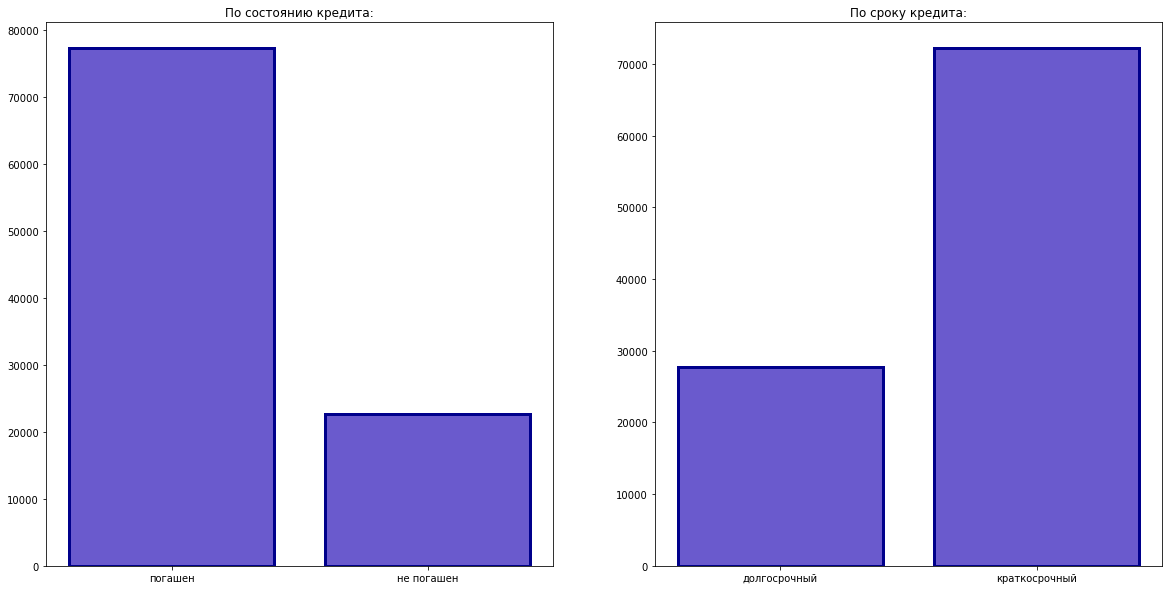

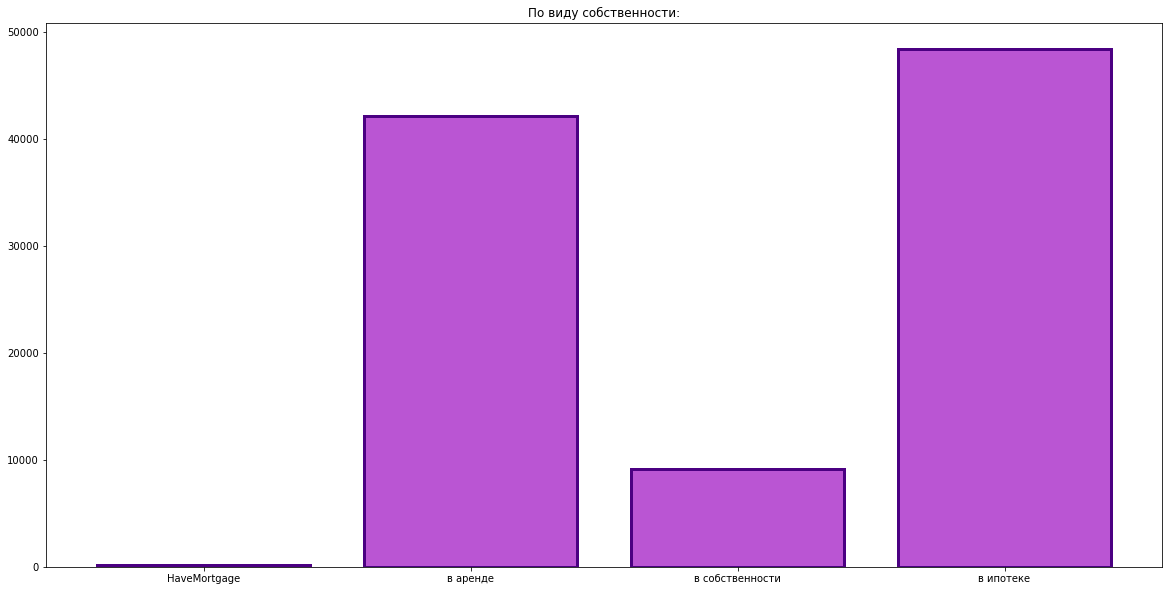

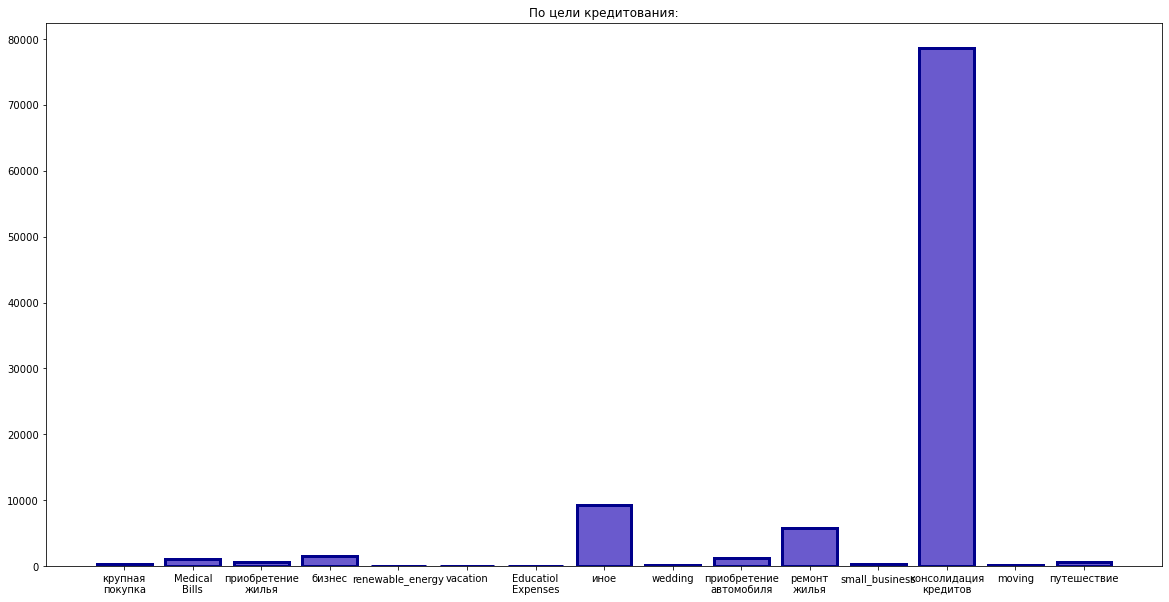

In [30]:
import csv
import matplotlib.pyplot as plt
import numpy as np


'''
Считать данные из файла Credits.csv. Построить гистограммы
клиентов: по признаку Статус.кредита; по признаку Срок.кредита, по
признаку Недвижимость, по признаку Цель.кредита. Рассчитать величину
среднего ежемесячного платежа, его дисперсию и среднее квадратическое
отклонение (средствами модуля numpy).
'''


class Client(object):
    def __init__(self, credit_state, credit_term, property_, target):
        self.credit_state = credit_state
        self.credit_term = credit_term
        self.property_ = property_
        self.target = target
        

def reader(path):
    with open(path, 'r') as file:
        clients = []
        reader = csv.DictReader(file, delimiter=';')
        for row in reader:
            clients.append(Client(row['Статус.кредита'], row['Срок.кредита'], row['Недвижимость'], row['Цель.кредита']))
    return clients


def credit_state_analysis(clients):
    result_data = []
    states = list(set([client.credit_state for client in clients]))
    
    for state in states:
        result_data.append([client.credit_state for client in clients].count(state))
    return states, result_data


def credit_term_analysis(clients):
    result_data = []
    terms = list(set([client.credit_term for client in clients]))
    
    for term in terms:
        result_data.append([client.credit_term for client in clients].count(term))
    return terms, result_data


def property_analysis(clients):
    result_data = []
    property_type = list(set([client.property_ for client in clients]))
    
    for types in property_type:
        result_data.append([client.property_ for client in clients].count(types))
    return property_type, result_data


def credit_target_analysis(clients):
    result_data = []
    new_targets = []
    targets = list(set([client.target for client in clients]))
    
    for target in targets:
        result_data.append([client.target for client in clients].count(target))
    
    for target in targets:
        if target.count(' ') == 1:
            new_targets.append(target.replace(' ', '\n'))
        else:
            new_targets.append(target)
            
    return new_targets, result_data
    

path = 'Credits.csv'
clients = reader(path)

states = credit_state_analysis(clients)[0]
states_data = credit_state_analysis(clients)[1]

terms = credit_term_analysis(clients)[0]
terms_data = credit_term_analysis(clients)[1]

property_types = property_analysis(clients)[0]
property_data = property_analysis(clients)[1]

targets = credit_target_analysis(clients)[0]
targets_data = credit_target_analysis(clients)[1]


fig_one, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
fig_two, (ax3) = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
fig_three, (ax4) = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

ax1.bar(states, states_data, color='slateblue', edgecolor='darkblue', linewidth=3)
ax1.set_title('По состоянию кредита:')
ax2.bar(terms, terms_data, color='slateblue', edgecolor='darkblue', linewidth=3)
ax2.set_title('По сроку кредита:')

ax3.bar(property_types, property_data, color ='mediumorchid', edgecolor='indigo', linewidth=3)
ax3.set_title('По виду собственности:')

ax4.bar(targets, targets_data, color='slateblue', edgecolor='darkblue', linewidth=3)
ax4.set_title('По цели кредитования:')

print('')